In [1]:
import tensorflow as tf
from utils import get_filenames, train_dev_split
from pipeline import input_fn
from model import model_fn
from visualize import plot_decoder_out, plot_some_imgs

%matplotlib inline

In [2]:
TRAIN_DATA_DIR = './datasets/train/'
DEV_DATA_DIR = './datasets/devset/'

IMG_SIZE = (32, 32)
BATCH_SIZE = 16
BUFFER_SIZE = 2000
EPOCHS = 10

LATENT_DIMS = 20

In [3]:
train_dev_split(TRAIN_DATA_DIR, DEV_DATA_DIR)

Moving 5000 files


In [3]:
STEPS = EPOCHS * (len(get_filenames(TRAIN_DATA_DIR, shuffle=True)) // BATCH_SIZE)

In [4]:
print('Number of Steps: {}\tBatches Per Epoch: {}\tNumber of Epochs: {}'.format(
    STEPS, STEPS // EPOCHS, EPOCHS))

Number of Steps: 28120	Batches Per Epoch: 2812	Number of Epochs: 10


Displaying 100 images


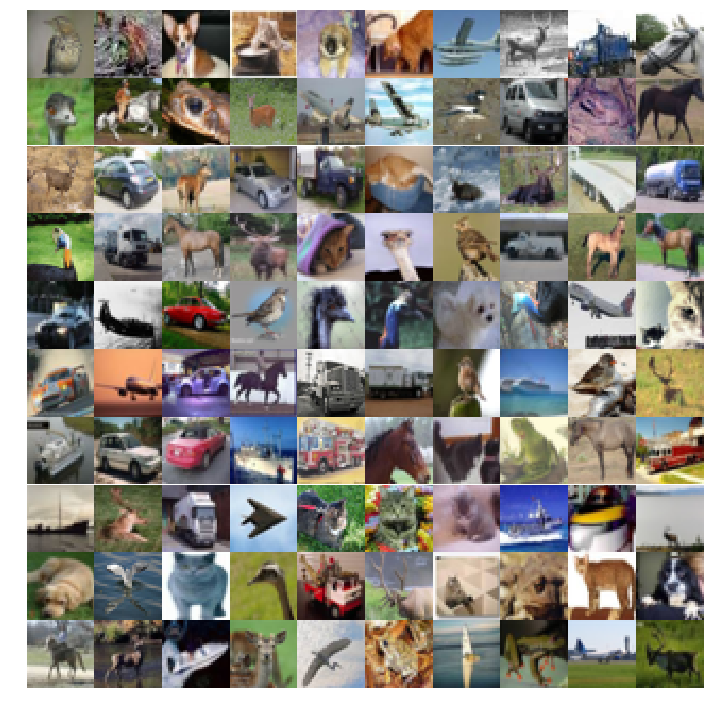

In [6]:
plot_some_imgs(TRAIN_DATA_DIR)

In [5]:
ae = tf.estimator.Estimator(model_fn=model_fn,
                            params={'out_channels': 3,
                                    'lr': 0.0001},
                            model_dir='./ae_ssc')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_log_step_count_steps': 100, '_task_id': 0, '_train_distribute': None, '_model_dir': './ae_ssc', '_save_summary_steps': 100, '_task_type': 'worker', '_save_checkpoints_secs': 600, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f7f7c5dffd0>, '_evaluation_master': '', '_save_checkpoints_steps': None, '_global_id_in_cluster': 0, '_num_ps_replicas': 0, '_session_config': None, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_keep_checkpoint_max': 5, '_master': '', '_tf_random_seed': None, '_num_worker_replicas': 1}


In [29]:
ae.train(input_fn=lambda: input_fn(get_filenames(TRAIN_DATA_DIR),
                                   IMG_SIZE,
                                   noising_ratio=0.7,
                                   batch_size=BATCH_SIZE,
                                   buffer_size=BUFFER_SIZE),
         steps=STEPS)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./ae_ssc/model.ckpt-224960
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 224961 into ./ae_ssc/model.ckpt.
INFO:tensorflow:loss = 0.011503458, step = 224960
INFO:tensorflow:global_step/sec: 42.8556
INFO:tensorflow:loss = 0.0116488, step = 225060 (2.336 sec)
INFO:tensorflow:global_step/sec: 56.2221
INFO:tensorflow:loss = 0.012661397, step = 225160 (1.779 sec)
INFO:tensorflow:global_step/sec: 55.8966
INFO:tensorflow:loss = 0.015496765, step = 225260 (1.788 sec)
INFO:tensorflow:global_step/sec: 55.2233
INFO:tensorflow:loss = 0.013844191, step = 225360 (1.811 sec)
INFO:tensorflow:global_step/sec: 55.8592
INFO:tensorflow:loss = 0.014198753, step = 225460 (1.789 sec)
INFO:tensorflow:global_step/sec: 55.7127
INFO:tensorflow:lo

In [30]:
ae.evaluate(input_fn=lambda: input_fn(get_filenames(DEV_DATA_DIR),
                                      IMG_SIZE,
                                      batch_size=BATCH_SIZE,
                                      buffer_size=BUFFER_SIZE,
                                      shuffle=False,
                                      repeat=False))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-27-10:22:39
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./ae_ssc/model.ckpt-253080
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-27-10:22:42
INFO:tensorflow:Saving dict for global step 253080: global_step = 253080, loss = 0.015258156


{'global_step': 253080, 'loss': 0.015258156}

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./ae_ssc/model.ckpt-253080
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


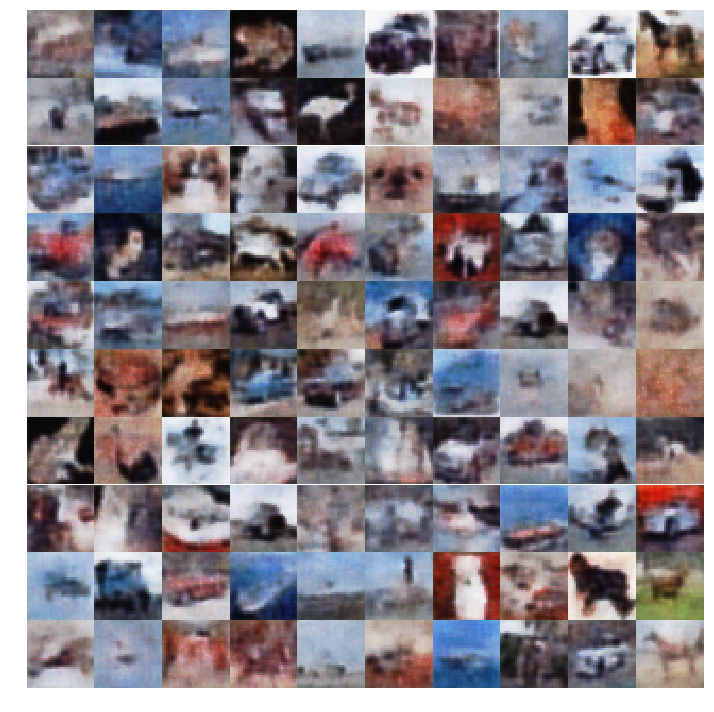

In [31]:
preds = ae.predict(input_fn=lambda: input_fn(get_filenames(DEV_DATA_DIR),
                                             IMG_SIZE,
                                             batch_size=BATCH_SIZE,
                                             buffer_size=BUFFER_SIZE,
                                             shuffle=False,
                                             repeat=False))
plot_decoder_out(preds)

In [32]:
ae.evaluate(input_fn=lambda: input_fn(get_filenames(DEV_DATA_DIR),
                                       IMG_SIZE,
                                       noising_ratio=0.2,
                                       batch_size=BATCH_SIZE,
                                       buffer_size=BUFFER_SIZE,
                                       shuffle=False,
                                       repeat=False))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-27-10:23:06
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./ae_ssc/model.ckpt-253080
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-27-10:23:09
INFO:tensorflow:Saving dict for global step 253080: global_step = 253080, loss = 0.023343986


{'global_step': 253080, 'loss': 0.023343986}

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./ae_ssc/model.ckpt-253080
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


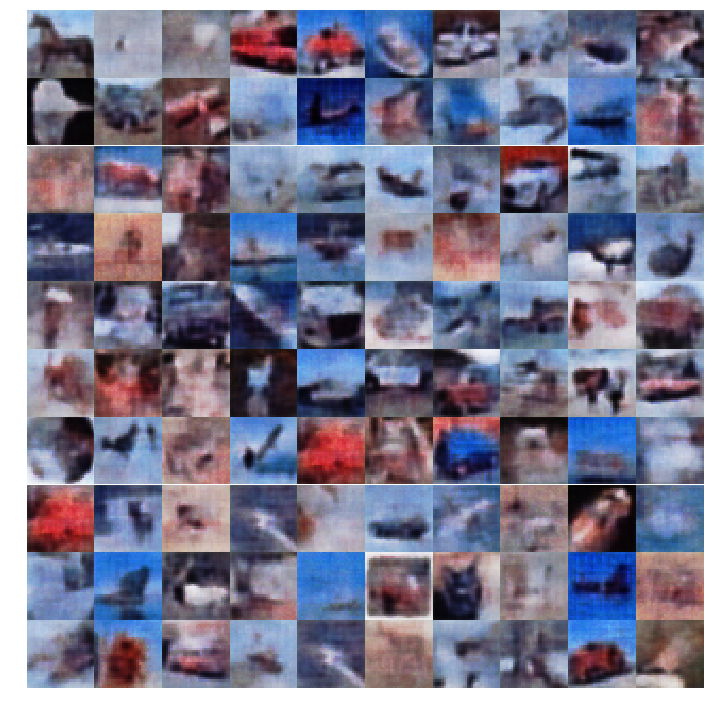

In [33]:
preds = ae.predict(input_fn=lambda: input_fn(get_filenames(DEV_DATA_DIR),
                                              IMG_SIZE,
                                              noising_ratio=0.2,
                                              batch_size=BATCH_SIZE,
                                              buffer_size=BUFFER_SIZE,
                                              shuffle=False,
                                              repeat=False))
plot_decoder_out(preds)

In [34]:
ae.evaluate(input_fn=lambda: input_fn(get_filenames(DEV_DATA_DIR),
                                       IMG_SIZE,
                                       noising_ratio=0.,
                                       batch_size=BATCH_SIZE,
                                       buffer_size=BUFFER_SIZE,
                                       shuffle=False,
                                       repeat=False))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-27-10:23:26
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./ae_ssc/model.ckpt-253080
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-27-10:23:29
INFO:tensorflow:Saving dict for global step 253080: global_step = 253080, loss = 0.05792758


{'global_step': 253080, 'loss': 0.05792758}

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./ae_ssc/model.ckpt-253080
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


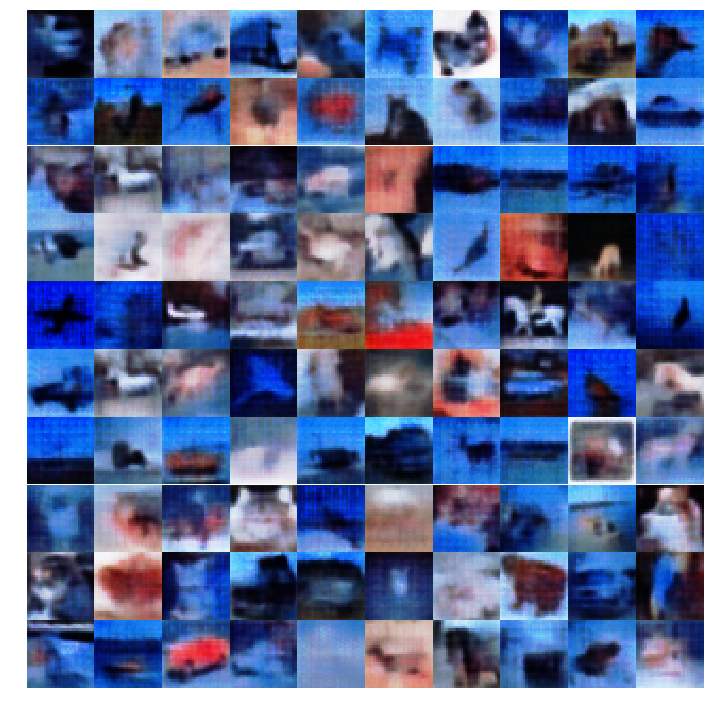

In [35]:
preds = ae.predict(input_fn=lambda: input_fn(get_filenames(DEV_DATA_DIR),
                                              IMG_SIZE,
                                              noising_ratio=0.,
                                              batch_size=BATCH_SIZE,
                                              buffer_size=BUFFER_SIZE,
                                              shuffle=False,
                                              repeat=False))
plot_decoder_out(preds)